# K-Nearest Neighbors

![IRIS](17_knn_classification/iris_petal_sepal.png)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
df['flower name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


I will create 3 different dataframes for each class setosa (0), versicolor (1), and viriginica (2)

In [12]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

**Sepal Length vs Sepal Width (Setosa vs Versicolor)**

Text(0, 0.5, 'Versicolor')

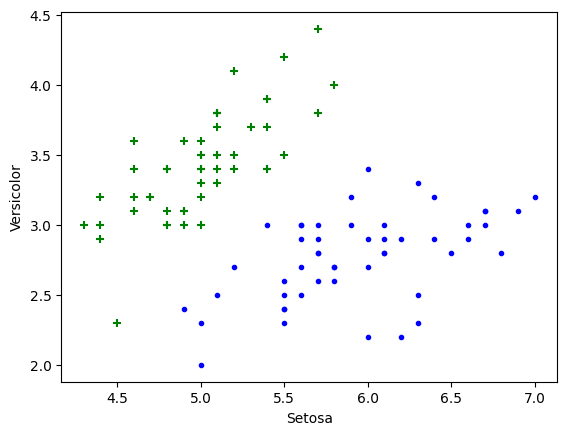

In [13]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

**Petal Length vs Petal Width (Versicolor vs Vriginica)**

Text(0, 0.5, 'Petal Width')

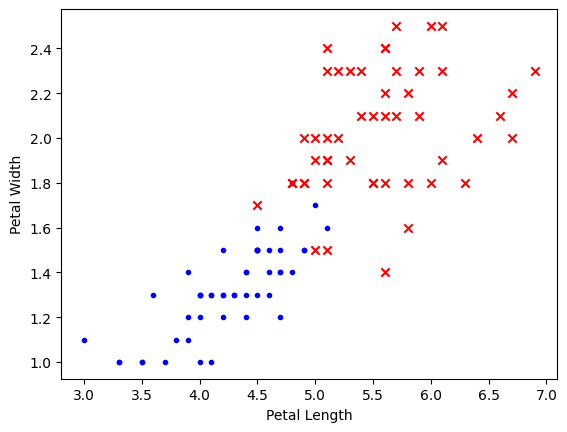

In [17]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', marker='x')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Train test split

In [18]:
X = df.drop(['target', 'flower name'], axis=1)
y = df['target']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
print(f'X train length: {len(X_train)}')
print(f'X test length: {len(X_test)}')

X train length: 120
X test length: 30


Create KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # number of k
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
knn.score(X_test, y_test)

0.9666666666666667

Let's use GridSearchSV for the best number k

In [34]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
}, cv=5, return_train_score=False)

In [35]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [36]:
clf.cv_results_

{'mean_fit_time': array([0.00469151, 0.00632877, 0.00313468, 0.00363784, 0.00395665,
        0.00403838, 0.01018729, 0.01527743, 0.00399504, 0.00348115]),
 'std_fit_time': array([0.00149966, 0.00511204, 0.0013921 , 0.00091396, 0.00225075,
        0.00215566, 0.00695104, 0.02538759, 0.00158328, 0.00131984]),
 'mean_score_time': array([0.00881886, 0.00638852, 0.00936055, 0.00450277, 0.0089788 ,
        0.00273271, 0.00671825, 0.00416961, 0.01278477, 0.00386763]),
 'std_score_time': array([0.00242007, 0.00739749, 0.002931  , 0.00081729, 0.00229949,
        0.00050156, 0.00415076, 0.00220895, 0.00847034, 0.00140811]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7, 9, 9, 11, 11],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'dis

In [37]:
cv_results = pd.DataFrame(clf.cv_results_)

In [40]:
cv_results[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'n_neighbors': 3, 'weights': 'uniform'}",0.950000
1,"{'n_neighbors': 3, 'weights': 'distance'}",0.950000
2,"{'n_neighbors': 5, 'weights': 'uniform'}",0.983333
3,"{'n_neighbors': 5, 'weights': 'distance'}",0.983333
4,"{'n_neighbors': 7, 'weights': 'uniform'}",0.975000
5,"{'n_neighbors': 7, 'weights': 'distance'}",0.975000
6,"{'n_neighbors': 9, 'weights': 'uniform'}",0.983333
7,"{'n_neighbors': 9, 'weights': 'distance'}",0.983333
8,"{'n_neighbors': 11, 'weights': 'uniform'}",0.958333
9,"{'n_neighbors': 11, 'weights': 'distance'}",0.975000


`5 is the ideal number of k with 98% of accuracy`

In [41]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
# cm = confusion_matrix(Truth/Actual, Predicted)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

Text(95.72222222222221, 0.5, 'Truth')

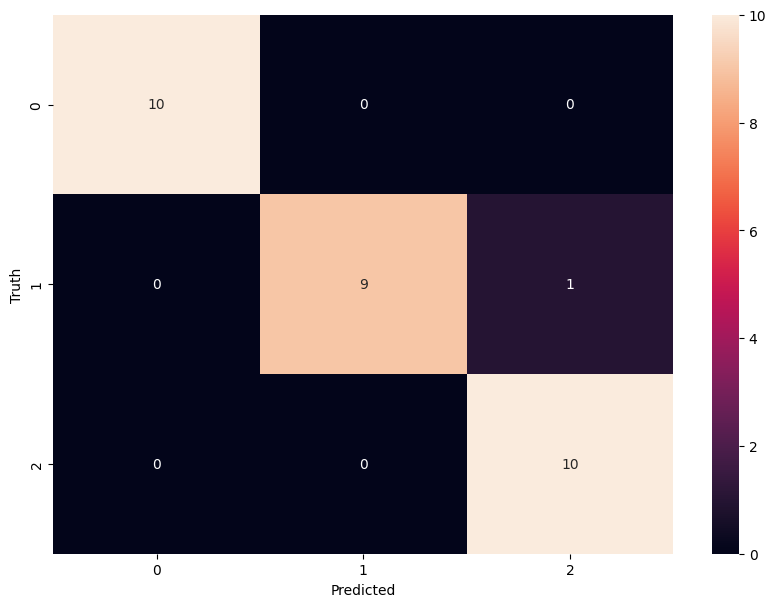

In [42]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

